# Task 2 - Data Cleaning & Exploratory Data Analysis (EDA)

---
Objective:
The goal of this task is to perform data cleaning and EDA on the Titanic dataset. The purpose is to explore the relationships between variables and identify meaningful patterns or trends in the data.


# Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


# Load the dataset

In [3]:
df=pd.read_csv('/content/train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Exploring The Data

# Display 1st 5 rows

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Shape of the dataset

In [5]:
df.shape

(891, 12)

# Display information about the dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Check basic statistics of numerical columns

In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Display column names

In [8]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# Data Cleaning & Preprocessing

# Handle missing values

In [9]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


# Check For Duplicate Rows

In [10]:
df.duplicated().sum()

np.int64(0)

# clean the dataset by filling missing values instead of dropping them

In [11]:
# Fill missing Age with the median value
df['Age'].fillna(df['Age'].median(), inplace=True)

# Fill missing Embarked with the most frequent value (mode)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# If Cabin column exists, fill missing values with a placeholder
if 'Cabin' in df.columns:
    df['Cabin'].fillna('Unknown', inplace=True)

/tmp/ipython-input-11-2803074881.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/tmp/ipython-input-11-2803074881.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

# Again check missing values

In [12]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


# Check Data Types

In [13]:
df.dtypes

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


# Exploratory Data Analysis (EDA)

# Histplot: Age Distribution

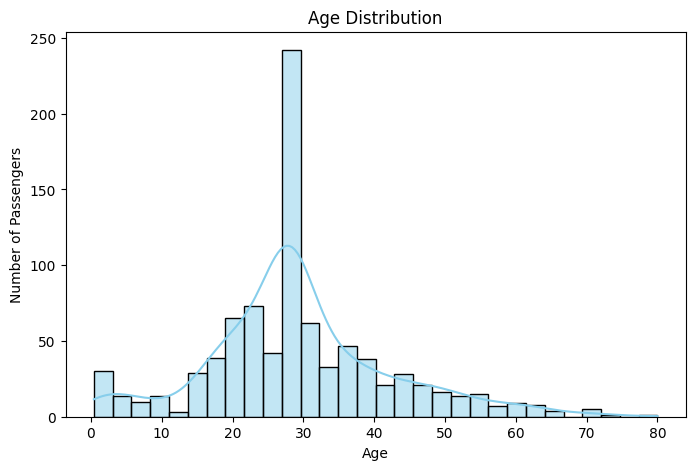

In [14]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Age'], bins=30, kde=True, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Number of Passengers')
plt.show()

# Insights


---


* Most of the passengers are between 20 and 40 years old.
* Highest number of people are around age 28-30.
* There are very few passengers under 5 or above 70 years.
* The distribution is slightly right-skewed.ie,younger passengers are more than older ones.
* The KDE (blue curve) shows the average age trend is concentrated around 28.


# Bar Plot: Survival Rate by Gender

/tmp/ipython-input-15-231921006.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sex', y='Survived', data=gender_survival, palette='Set2')


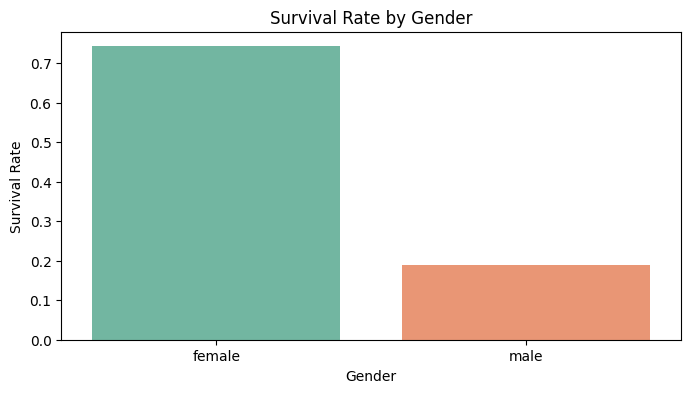

In [15]:
gender_survival = df.groupby('Sex')['Survived'].mean().reset_index()

plt.figure(figsize=(8,4))
sns.barplot(x='Sex', y='Survived', data=gender_survival, palette='Set2')
plt.title('Survival Rate by Gender')
plt.ylabel('Survival Rate')
plt.xlabel('Gender')
plt.show()

# Insights


---

* Female passengers had a higher survival rate than Males.ie, more women survived in the Titanic accident.
* male passengers had much lower survival rate,which indicates that more priority was given to women during the rescue.
* So this shows that gender played an important role in survival chances.


# Boxplot: Fare vs Pclass

/tmp/ipython-input-16-1852283635.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Pclass', y='Fare', data=df, palette='pastel')


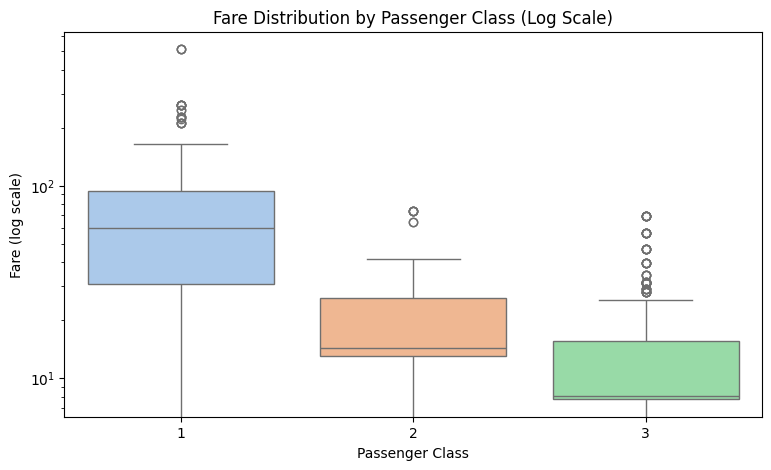

In [16]:
plt.figure(figsize=(9,5))
sns.boxplot(x='Pclass', y='Fare', data=df, palette='pastel')
plt.yscale('log')
plt.title('Fare Distribution by Passenger Class (Log Scale)')
plt.xlabel('Passenger Class')
plt.ylabel('Fare (log scale)')
plt.show()

# Insights


---

* First class passengers generally paid the highest fare.  
* Fare amount decreases with passenger classes.
* There are few outliers seen in each classes.A few passengers paid more than others.










# Correlation Heatmap

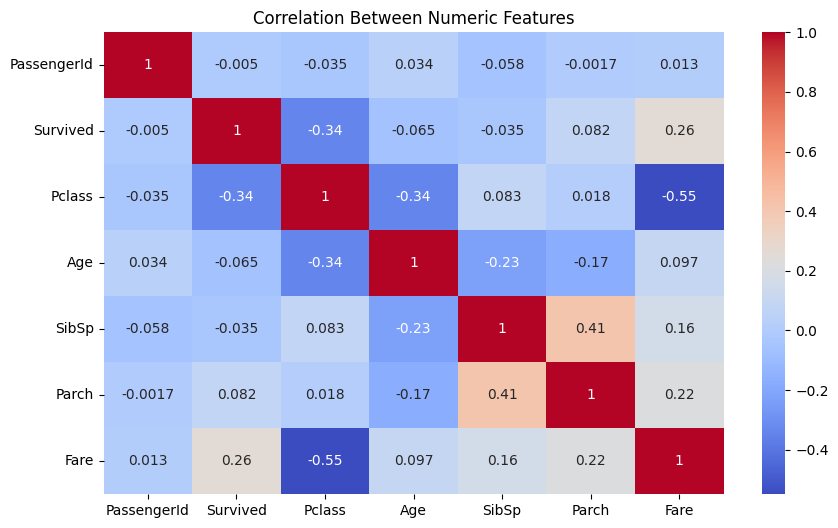

In [18]:
plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Between Numeric Features')
plt.show()

# Insights


---

* Fare and Pclass are negatively correlated (-0.05).ie, first class passengers paid more.  
* Survived shows a positive correlation with Fare (0.26).ie, people who paid more fare had more chance to survive.
* Pclass is negatively correlated with survived (-0.34).ie, first class passengers had better survival rate.
* Other columns have very weak relation with survival.  

# Scatterplot: Age vs Fare

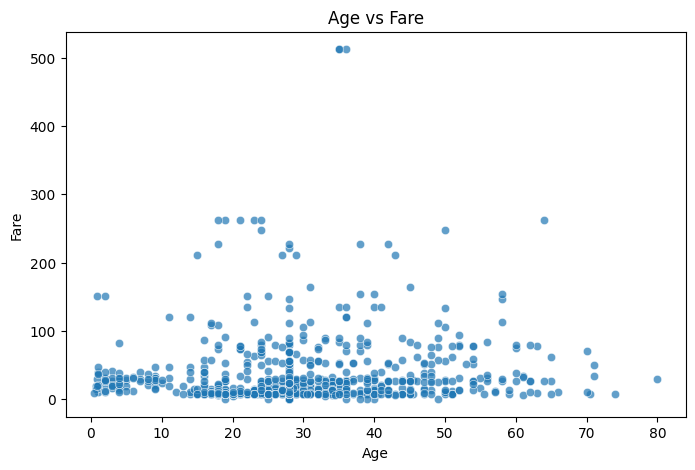

In [19]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='Age', y='Fare', alpha=0.7)
plt.title("Age vs Fare")
plt.xlabel("Age")
plt.ylabel("Fare")
plt.show()

# Insights


---

* People who paid more money were mostly younger or middle-aged.
* Survivors are from all age groups, but many of them paid more.
* Some old people also survived if they paid more fare.
* So, age and fare both seem to affect survival.  


# Stacked Bar Plot: Survival Count By Class And Gender

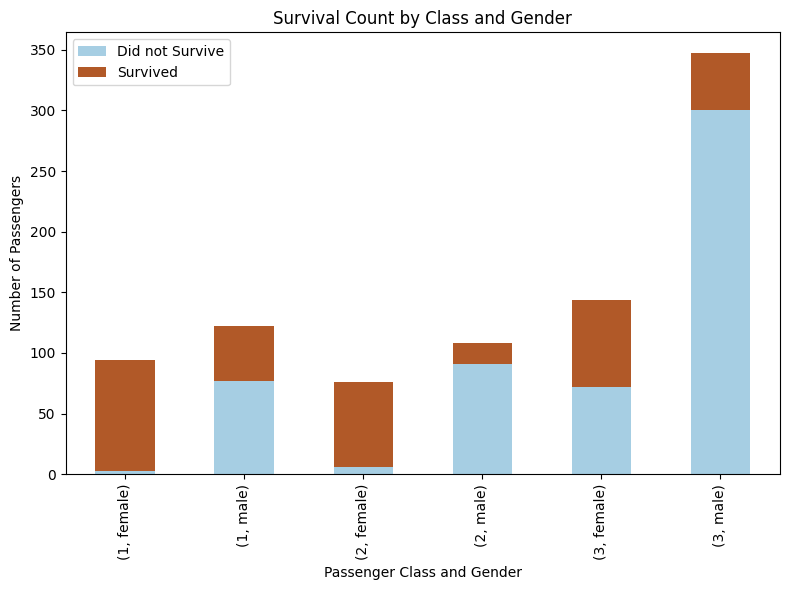

In [20]:
stacked_data = pd.crosstab([df['Pclass'], df['Sex']], df['Survived'])

stacked_data.plot(kind='bar', stacked=True, figsize=(8, 6), colormap='Paired')
plt.title("Survival Count by Class and Gender")
plt.xlabel("Passenger Class and Gender")
plt.ylabel("Number of Passengers")
plt.legend(["Did not Survive", "Survived"])
plt.tight_layout()
plt.show()

# Insights


---

* In 1st class, females survived & males did not survived.
* In 2nd class, females also had good survival.
* In 3rd class, males had the lowest survival.  
* In 2nd & 3rd class, most of the males are died.Few females are survided.
* Overall, women survived more than men.

# Pie Chart: Embarked Port Distribution

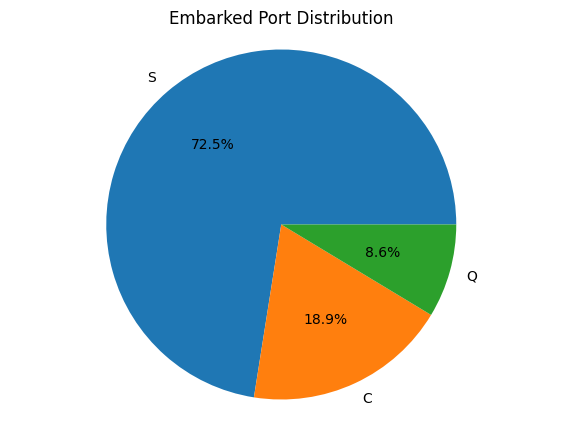

In [21]:
embarked_counts = df['Embarked'].value_counts()

plt.figure(figsize=(7, 5))
plt.pie(embarked_counts, labels=embarked_counts.index, autopct='%1.1f%%')
plt.title('Embarked Port Distribution')
plt.axis('equal')
plt.show()

# Insights


---

* Most of the passengers (72.5%) got on the ship from Southampton (S).
* 18.9% of people started from Cherbourg (C).
* Only 8.6% came from Queenstown (Q).  
* So, Southampton was the main port where most people boarded the Titanic.


# Violin Plot – Age vs. Passenger Class

/tmp/ipython-input-22-335094886.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Pclass', y='Age', data=df, palette='Set2')


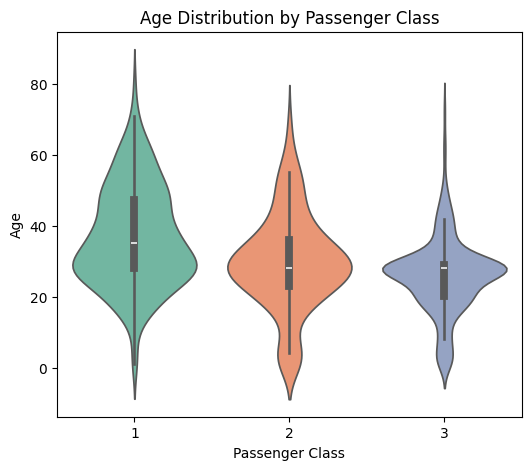

In [22]:
plt.figure(figsize=(6, 5))
sns.violinplot(x='Pclass', y='Age', data=df, palette='Set2')

plt.title('Age Distribution by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Age')
plt.show()

# Insights


---

* 1st class passengers were mostly older, around age 35–40.
* 2nd class had a mix of young and middle-aged, average around 30.
* 3rd class had more younger passengers, around 20.
*  Overall, younger people travelled in lower classes and older in higher classes.

# Strip Plot – Age vs. Gender

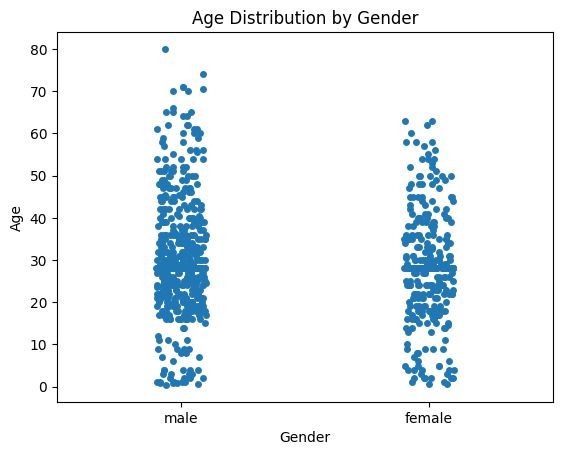

In [23]:
sns.stripplot(data=df, x='Sex', y='Age', jitter=True)
plt.title('Age Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.show()

# Insights


---

* Ages range from 0 to 80 for both males and females.
* Both genders have clusters in the 20–40 age range.
* The male category has slightly more data points than female.
* Both genders show a vertical spread, indicating a similar distribution across age groups.  

# KDE Plot – Age Distribution by Survival

/tmp/ipython-input-24-3317018459.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df['Survived'] == 0]['Age'], label='Not Survived', shade=True)
/tmp/ipython-input-24-3317018459.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df['Survived'] == 1]['Age'], label='Survived', shade=True)


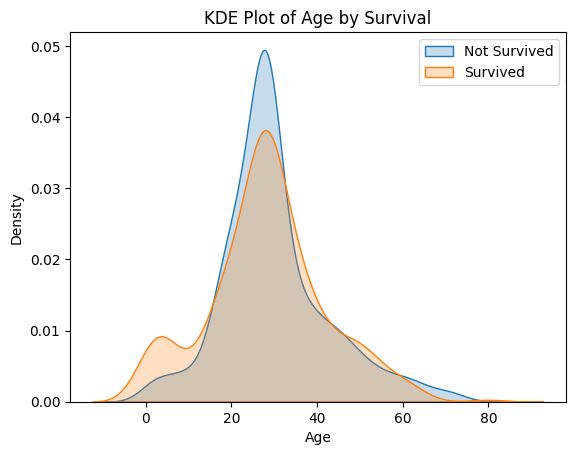

In [24]:
sns.kdeplot(data=df[df['Survived'] == 0]['Age'], label='Not Survived', shade=True)
sns.kdeplot(data=df[df['Survived'] == 1]['Age'], label='Survived', shade=True)
plt.title('KDE Plot of Age by Survival')
plt.xlabel('Age')
plt.legend()
plt.show()

# Insights


---

* Age 0–10 shows more survivors than non-survivors. ie,kids have more chance of survival.
* Young adults (20–35) also had better chances of survival.
* Around age 30, more people did not survive.ie,non-survivor line is higher.  
* Both lines are similar above age 60.ie,survival and death were almost equal.  
* Overall, age affects survival, especially for children and young adults.  

# Point Plot: Survival by Embarkation Port and Gender

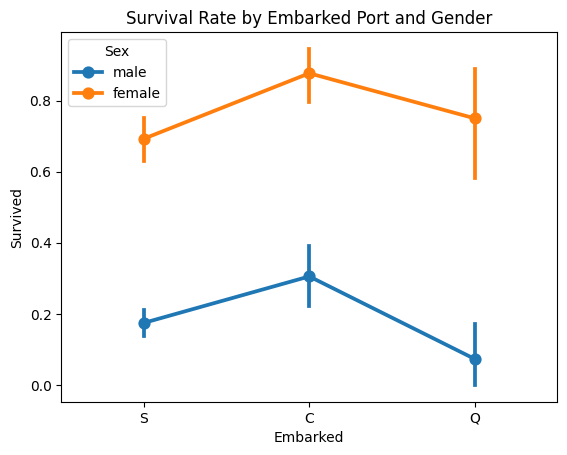

In [25]:
sns.pointplot(data=df, x='Embarked', y='Survived', hue='Sex')
plt.title("Survival Rate by Embarked Port and Gender")
plt.show()

# Insights


---
* Female passengers had a higher survival rate across all embarkation ports (S,C,Q).
* The highest female survival rate was from Cherbourg (C).  
* Male survival rate was consistently lower, especially those who boarded from Queenstown (Q).

# Swarm Plot: Age vs. Fare by Survival

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 17.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 22.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 9.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


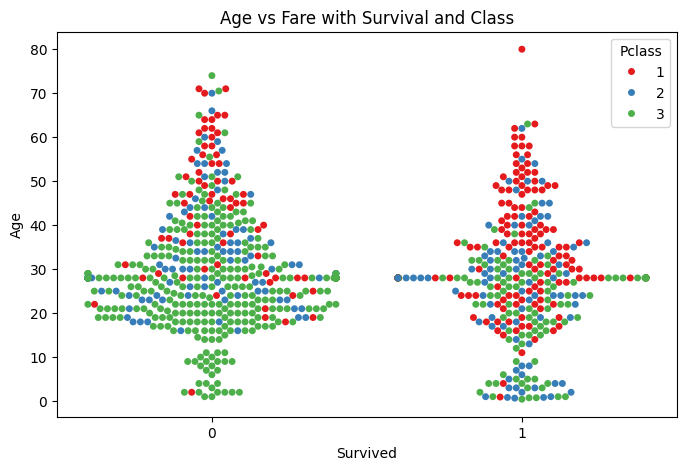

In [26]:
plt.figure(figsize=(8, 5))
sns.swarmplot(data=df[df['Fare'] < 300], x='Survived', y='Age', hue='Pclass', palette='Set1')
plt.title('Age vs Fare with Survival and Class')
plt.xlabel('Survived')
plt.ylabel('Age')
plt.show()

# insights


---
* Most passengers were aged between 20 to 40 in both survived and not survived groups.  
* More people aged 30–40 survived, mostly from 1st and 2nd class.
* Many 3rd class (green) people didn’t survive, especially age 20–30.  
* Small kids (below 10) had better survival chances.
* Peoples in 1st class (red) survived more, 3rd class (green) died more.

# Step Plot: Survival Count Over Age Groups

/tmp/ipython-input-27-2332077963.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_survival = df.groupby('Age_bin')['Survived'].sum()


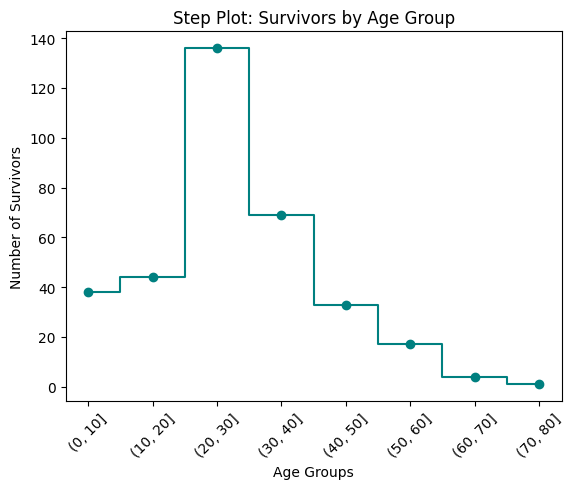

In [27]:
df['Age_bin'] = pd.cut(df['Age'], bins=[0,10,20,30,40,50,60,70,80])
age_survival = df.groupby('Age_bin')['Survived'].sum()

age_survival.plot(drawstyle='steps-mid', marker='o', color='teal')
plt.title('Step Plot: Survivors by Age Group')
plt.xlabel('Age Groups')
plt.ylabel('Number of Survivors')
plt.xticks(rotation=45)
plt.show()

# Insights


---

* Most survivors were in the age group 20–30.This group had the highest count,  because they were young and could act fast.
* Medium survival in 10–20 and 30–40 age groups.  
* Survival rate dropped after age 40, especially above 50.Older people may have found it harder to escape quickly.
* So, younger age groups had better survival chances compared to older ones.  

# Count Plot: Ticket Frequency

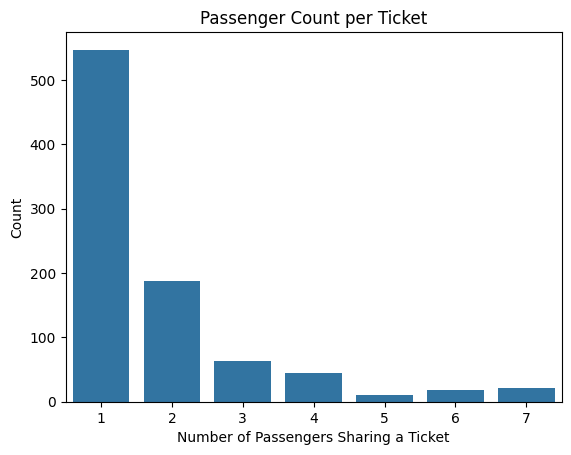

In [28]:
ticket_counts = df['Ticket'].value_counts()
df['Ticket_Freq'] = df['Ticket'].map(ticket_counts)

sns.countplot(x='Ticket_Freq', data=df)
plt.title("Passenger Count per Ticket")
plt.xlabel("Number of Passengers Sharing a Ticket")
plt.ylabel("Count")
plt.show()

# Insights


---
* Most tickets were used by only 1 passenger (over 500 counts).
* Around 190 tickets were shared by 2 people.  
* Very few tickets were shared by 3 or more passengers.
* So, the data shows that solo travel was most common, while group travel was less frequent and rare in larger sizes.

# Pairplot: Age, Fare, Class – Survival Relationship

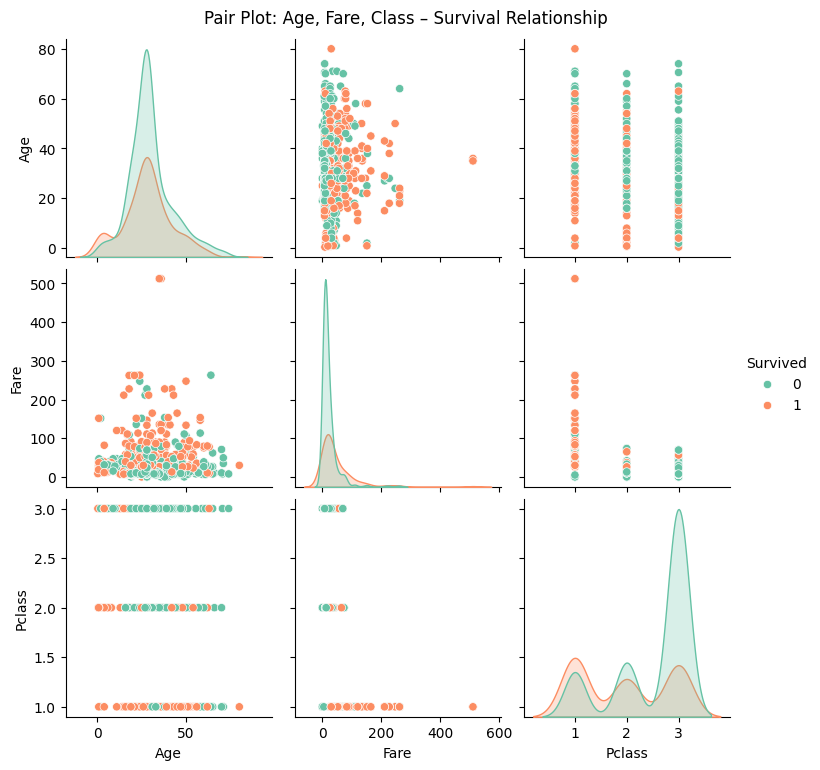

In [34]:
plot_data = df[['Age', 'Fare', 'Pclass', 'Survived']]

sns.pairplot(plot_data, hue='Survived', palette='Set2')
plt.suptitle("Pair Plot: Age, Fare, Class – Survival Relationship", y=1.02)
plt.show()

# Insights


---


 Survival vs Age:  
* Most passengers were between 20–40 years.ie, Younger passengers had slightly higher survival rates & Older passengers (60+) had lower survival.

Survival vs Fare
* Majority of passengers paid low to mid-range fares.ie, Passengers who paid more had better survival chances.

Survival vs Class (Pclass):
* 1st class had the most survivors, 3rd class had the least.ie, there is a strong survival advantage for higher-class travelers.

Fare and Class:
* Fare increases as Pclass decreases (1st class paid more).ie, a strong correlation between Fare and Pclass.

Age and Class:
* 1st class passengers were generally older than 2nd and 3rd class.ie, Class distribution is more even across age groups.

Overall Trend:
* Survival is positively associated with high fare and 1st class.ie, Younger age groups had better survival, especially children.  

#  Final Summary: Key Insights from Titanic EDA


---
* Female passengers had higher survival rate than male.  
* 1st class passengers had the highest chance of survival, while 3rd class had the least.  
* Children & young adult had better chance of survival than older passengers.
* People who paid higher fares were mostly in 1st class and had better survival outcomes.  
* passengers with small families survived more than those alone.
* Embarkation point matters — most survivors boarded from Cherbourg (C).
* Survival had several relationships with Age,Fare & Class.  

# Conclusion:


---
This analysis provided a clear understanding of the factors influencing passenger survival on the Titanic, including gender, class, age group, and travel companions.
